## Importing Required Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns

## Dataset

In [ ]:
temp_data = pd.read_csv("/content/Consumo_cerveja.csv")

In [ ]:
temp_data.shape

(941, 7)

In [ ]:
temp_data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [ ]:
temp_data.dtypes

Data                            object
Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

## Rectifying data

In [ ]:
temp_data['Temperatura Media (C)'] = temp_data['Temperatura Media (C)'].replace(to_replace = ',', value = '.', regex = True)
temp_data['Temperatura Minima (C)'] = temp_data['Temperatura Minima (C)'].replace(to_replace = ',', value = '.', regex = True)
temp_data['Temperatura Maxima (C)'] = temp_data['Temperatura Maxima (C)'].replace(to_replace = ',', value = '.', regex = True)
temp_data['Precipitacao (mm)'] = temp_data['Precipitacao (mm)'].replace(to_replace = ',', value = '.', regex = True)

In [ ]:
temp_data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [ ]:
temp_data['Data'] = pd.to_datetime(temp_data['Data'])
temp_data['Data']

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
936          NaT
937          NaT
938          NaT
939          NaT
940          NaT
Name: Data, Length: 941, dtype: datetime64[ns]

In [ ]:
temp_data['Day'] = temp_data['Data'].dt.day
temp_data['Month'] = temp_data['Data'].dt.month

temp_data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day,Month
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461,1.0,1.0
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972,2.0,1.0
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814,3.0,1.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,4.0,1.0
4,2015-01-05,23.82,21,28.3,0,0.0,28.900,5.0,1.0


## Indexing

In [ ]:
temp_data.set_index('Data',inplace=True)

In [ ]:
temp_data.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day,Month
Data,,,,,,,,
2015-01-01,27.3,23.9,32.5,0,0.0,25.461,1.0,1.0
2015-01-02,27.02,24.5,33.5,0,0.0,28.972,2.0,1.0
2015-01-03,24.82,22.4,29.9,0,1.0,30.814,3.0,1.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,4.0,1.0
2015-01-05,23.82,21,28.3,0,0.0,28.900,5.0,1.0


## Data Analysis

In [ ]:
temp_data.isnull().sum()

Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
Day                            576
Month                          576
dtype: int64

Dropping null values

In [ ]:
temp_data.dropna(inplace= True)

In [ ]:
#Changing datatype of the columns

In [ ]:
temp_data['Temperatura Media (C)'] = temp_data['Temperatura Media (C)'].astype('float64')
temp_data['Temperatura Minima (C)'] = temp_data['Temperatura Minima (C)'].astype('float64')
temp_data['Temperatura Maxima (C)'] = temp_data['Temperatura Maxima (C)'].astype('float64')
temp_data['Precipitacao (mm)'] = temp_data['Precipitacao (mm)'].astype('float64')

In [ ]:
temp_data.duplicated()

Data
2015-01-01    False
2015-01-02    False
2015-01-03    False
2015-01-04    False
2015-01-05    False
              ...  
2015-12-27    False
2015-12-28    False
2015-12-29    False
2015-12-30    False
2015-12-31    False
Length: 365, dtype: bool

In [ ]:
temp_data.tail()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day,Month
Data,,,,,,,,
2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307,27.0,12.0
2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095,28.0,12.0
2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309,29.0,12.0
2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467,30.0,12.0
2015-12-31,24.76,20.2,29.0,0.0,0.0,22.446,31.0,12.0


In [ ]:
# prompt: Create a new feature 'Day' from the index in date format

temp_data['Day'] = temp_data.index.day


In [ ]:
temp_data.isnull().sum()

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
Day                            0
Month                          0
dtype: int64

Outlier analysis

<Axes: >

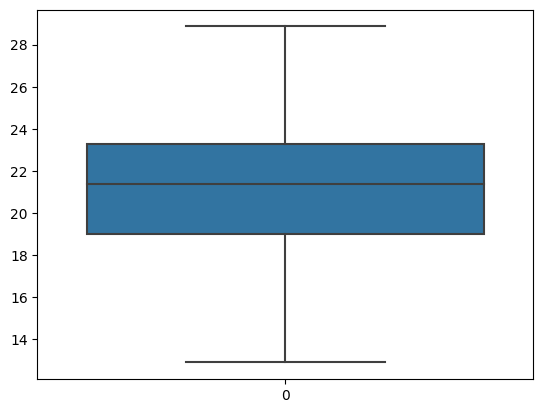

In [ ]:
sns.boxplot(temp_data['Temperatura Media (C)'])

<Axes: >

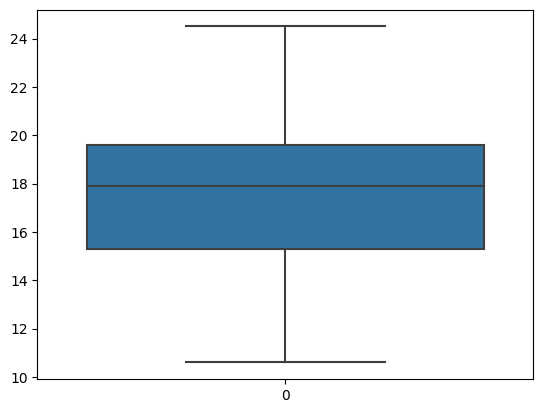

In [ ]:
sns.boxplot(temp_data['Temperatura Minima (C)'])

<Axes: >

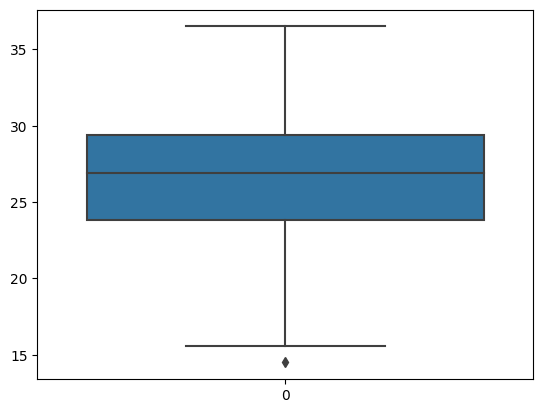

In [ ]:
sns.boxplot(temp_data['Temperatura Maxima (C)'])

<Axes: >

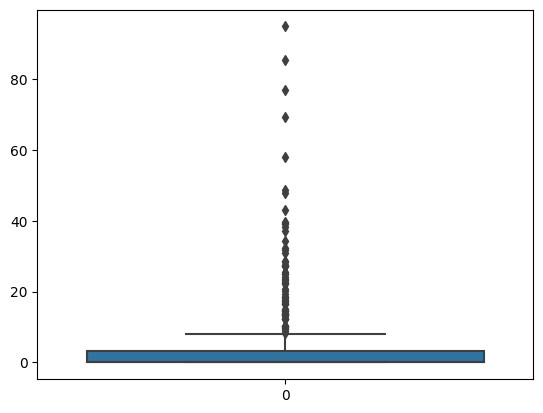

In [ ]:
sns.boxplot(temp_data['Precipitacao (mm)'])

<Axes: >

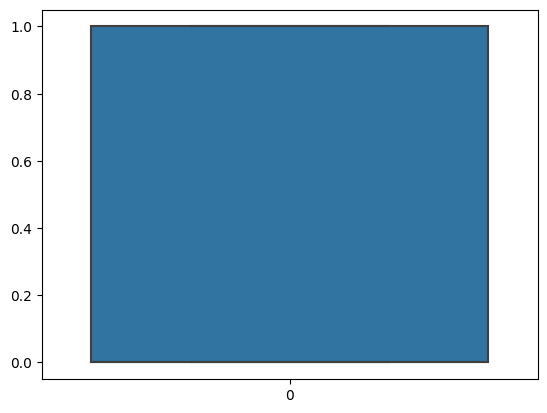

In [ ]:
sns.boxplot(temp_data['Final de Semana'])

<Axes: >

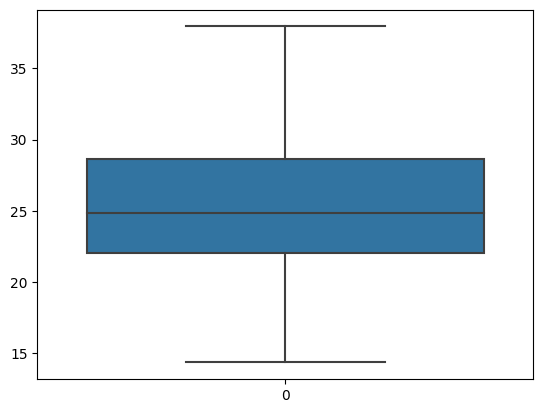

In [ ]:
sns.boxplot(temp_data['Consumo de cerveja (litros)'])

In [ ]:
x = temp_data.drop(columns = 'Consumo de cerveja (litros)')
y = temp_data['Consumo de cerveja (litros)']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

Intercept: 5.70033756621822
Coefficients: [-0.03661717  0.05910638  0.66069518 -0.05686946  5.10644942 -0.00659366
  0.11112669]


R2 Score

In [ ]:
score = regressor.score(x_test, y_test)
print("R2 score:", score)

R2 score: 0.6752327491700274


Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error
m = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", m)

Mean Absolute Error: 2.024344691464788


Root Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.400547375699958


**Problem Statement 2**

In [ ]:
Cal_Housing_data = pd.read_csv("/content/california_housing_train.csv")

In [ ]:
Cal_Housing_data.shape

(17000, 9)

Checking for Null values

In [ ]:
Cal_Housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
Cal_Housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
x = Cal_Housing_data.drop(columns = 'median_house_value',axis = 1)
y = Cal_Housing_data['median_house_value']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1000, random_state=0)

In [ ]:
x_test.shape

(1000, 8)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred2 = regressor.predict(x_test)
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

Intercept: -3619591.6775376913
Coefficients: [-4.30861845e+04 -4.28117411e+04  1.17167793e+03 -8.76656690e+00
  1.20394389e+02 -3.74535982e+01  4.17800068e+01  4.06517876e+04]


R2 Score

In [ ]:
score = regressor.score(x_test, y_test)
print("R2 score:", score)

R2 score: 0.6140658023056109


Mean **Absolute Error**

In [ ]:
from sklearn.metrics import mean_absolute_error
m = mean_absolute_error(y_test, y_pred2)
print("Mean Absolute Error:", m)

Mean Absolute Error: 52417.58551295789


**Problem Statement 3**

In [ ]:
insurance_data = pd.read_csv('/content/insurance.csv')

In [ ]:
insurance_data.shape

(1338, 7)

In [ ]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#One-Hot Encoding
Convert categorical features to numerical values

In [ ]:
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'])


In [ ]:
insurance_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
x = insurance_data.drop(columns = 'charges',axis = 1)
y = insurance_data['charges']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred3 = regressor.predict(x_test)
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

Intercept: -349.3703869501769
Coefficients: [   251.22566407    332.82271398    587.9253102      18.56120037
    -18.56120037 -11956.17261513  11956.17261513    527.72812674
    148.53816329   -256.75623287   -419.51005716]


R2 score

In [ ]:
score = regressor.score(x_test, y_test)
print("R2 score:", score)

R2 score: 0.7449415564623687


Root Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 6189.092934242134


#**Problem Statement 4**

In [ ]:
startups_data = pd.read_csv('/content/50_Startups.csv')

In [ ]:
startups_data.shape

(50, 5)

In [ ]:
startups_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Label Encoding

In [ ]:
startups_data['State'] = LabelEncoder().fit_transform(startups_data['State'])
startups_data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [ ]:
x = startups_data.drop(columns = 'Profit',axis = 1)
y = startups_data['Profit']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred4 = regressor.predict(x_test)
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

Intercept: 52022.77817967434
Coefficients: [ 8.10800557e-01 -4.47899103e-02  2.68062532e-02 -1.51843070e+02]


R2 score

In [ ]:
score = regressor.score(x_test, y_test)
print("R2 score:", score)

R2 score: 0.9794557471168575


Root Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred4))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 6366.792790427259


Regularize the model using Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(x_train, y_train)
y_pred5 = regressor.predict(x_test)
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)
# R2 score
score = regressor.score(x_test, y_test)
print("R2 score:", score)
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred5))
print("Root Mean Squared Error:", rmse)


Intercept: 52016.715738663755
Coefficients: [ 8.10793867e-01 -4.47898765e-02  2.68096479e-02 -1.46514855e+02]
R2 score: 0.9794572646241065
Root Mean Squared Error: 6366.557643578911


Regularize the model using Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
regressor = Lasso()
regressor.fit(x_train, y_train)
y_pred6 = regressor.predict(x_test)
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)
# R2 score
score = regressor.score(x_test, y_test)
print("R2 score:", score)
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred6))
print("Root Mean Squared Error:", rmse)

Intercept: 52021.122937931475
Coefficients: [ 8.10798731e-01 -4.47898998e-02  2.68071798e-02 -1.50388416e+02]
R2 score: 0.9794561635253997
Root Mean Squared Error: 6366.728266291162
